In [8]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 22})
import numpy as np
from astropy.io import fits
from astropy.time import Time, TimeDelta
from astropy import units as u

In [2]:
phases = os.listdir('data/images')
print (type(phases))
#phases = [phases[0]]
#phases = [phases[0]]

print(phases)

<class 'list'>
['20200316', '20200304', '20200314', '20200305', '20200319', '20200313', '20200306']


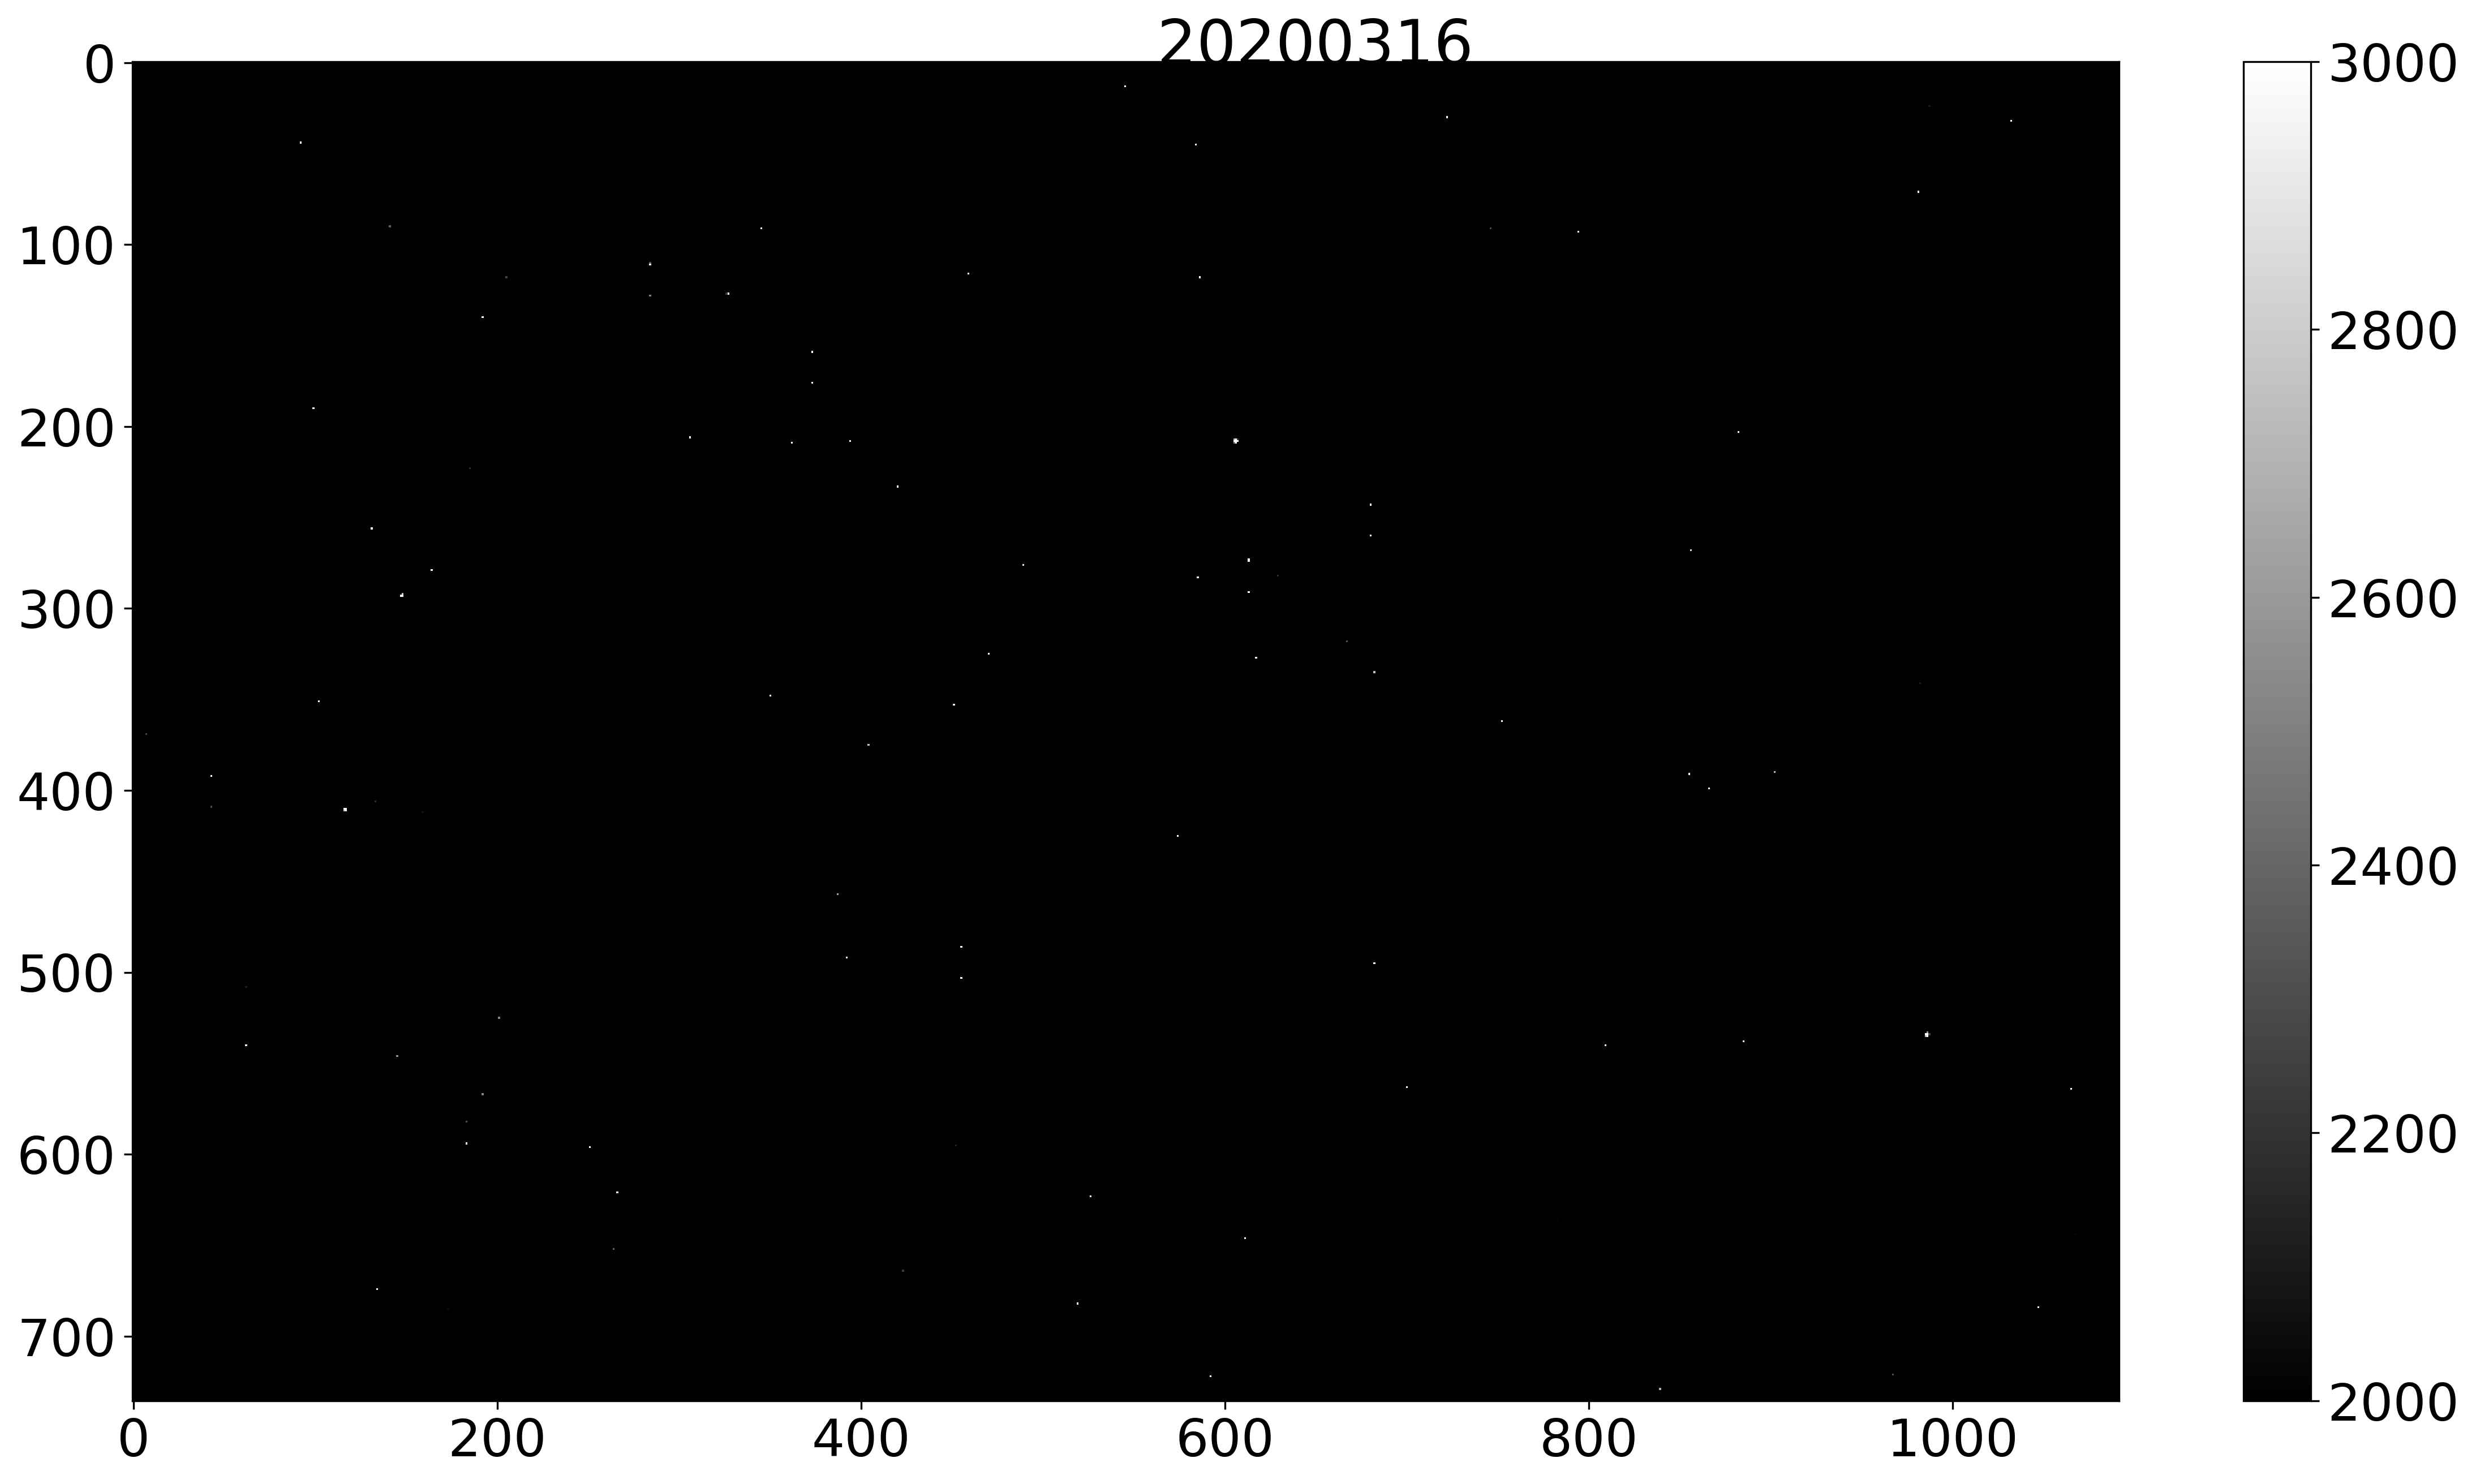

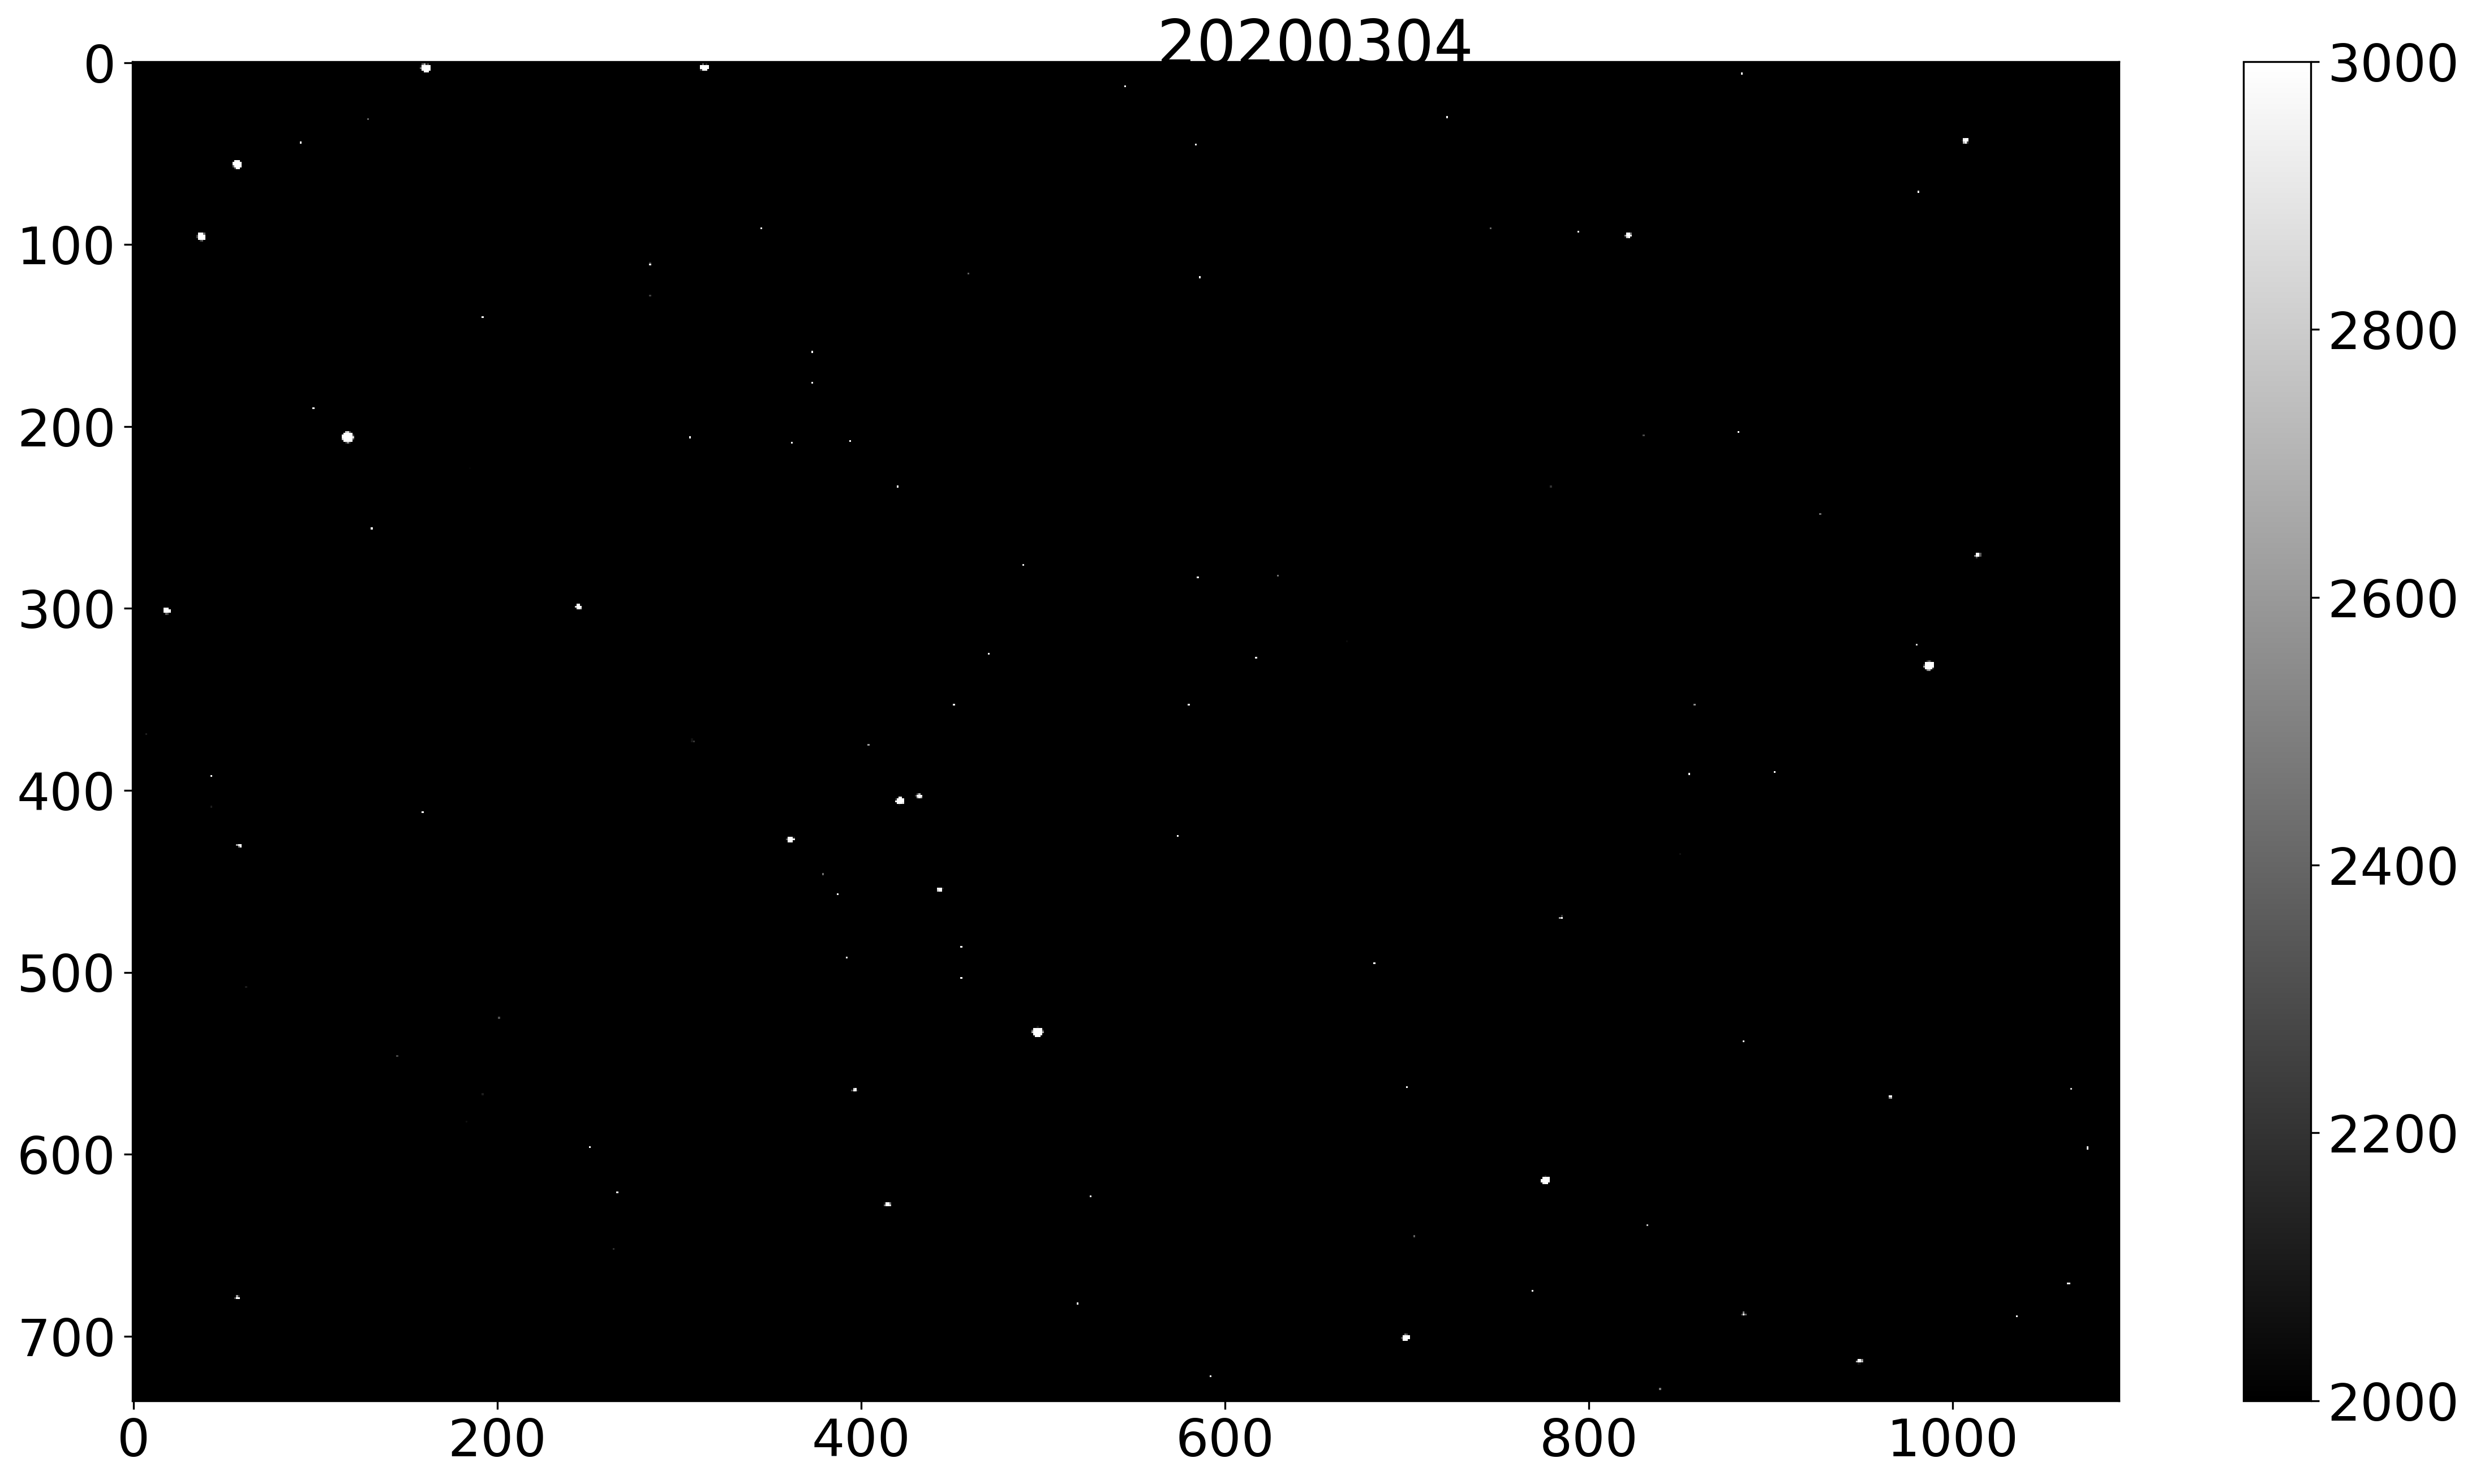

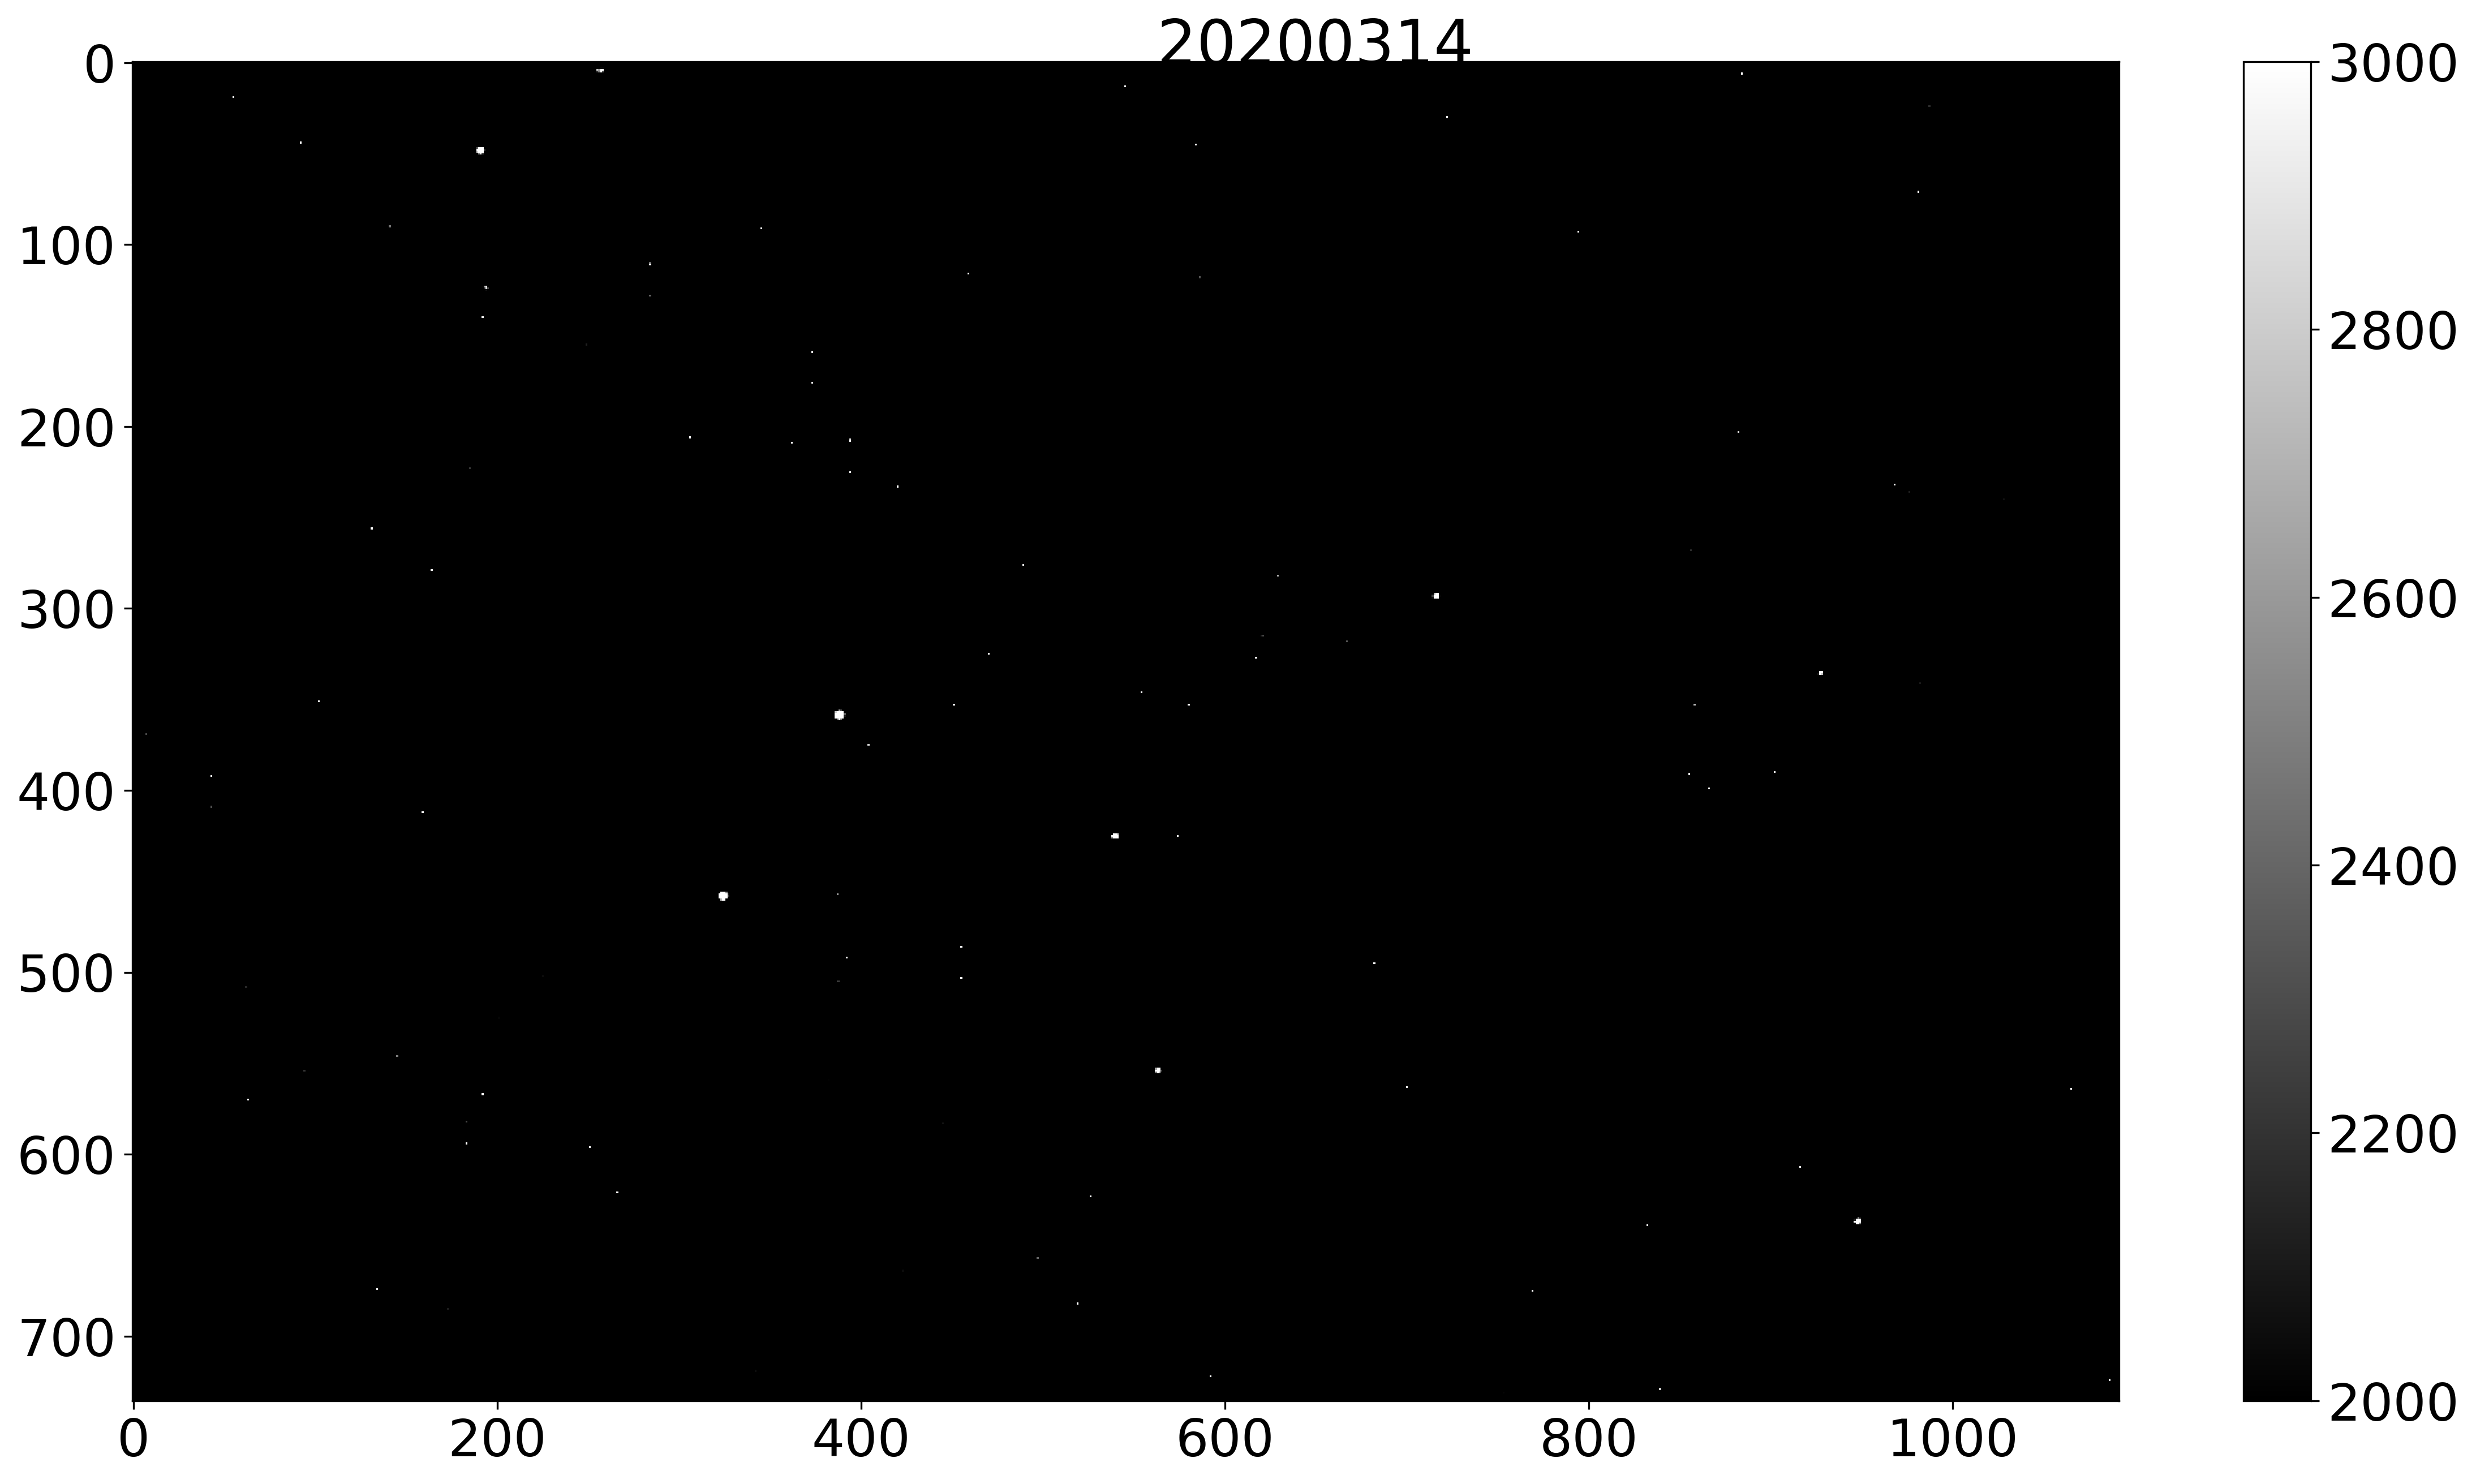

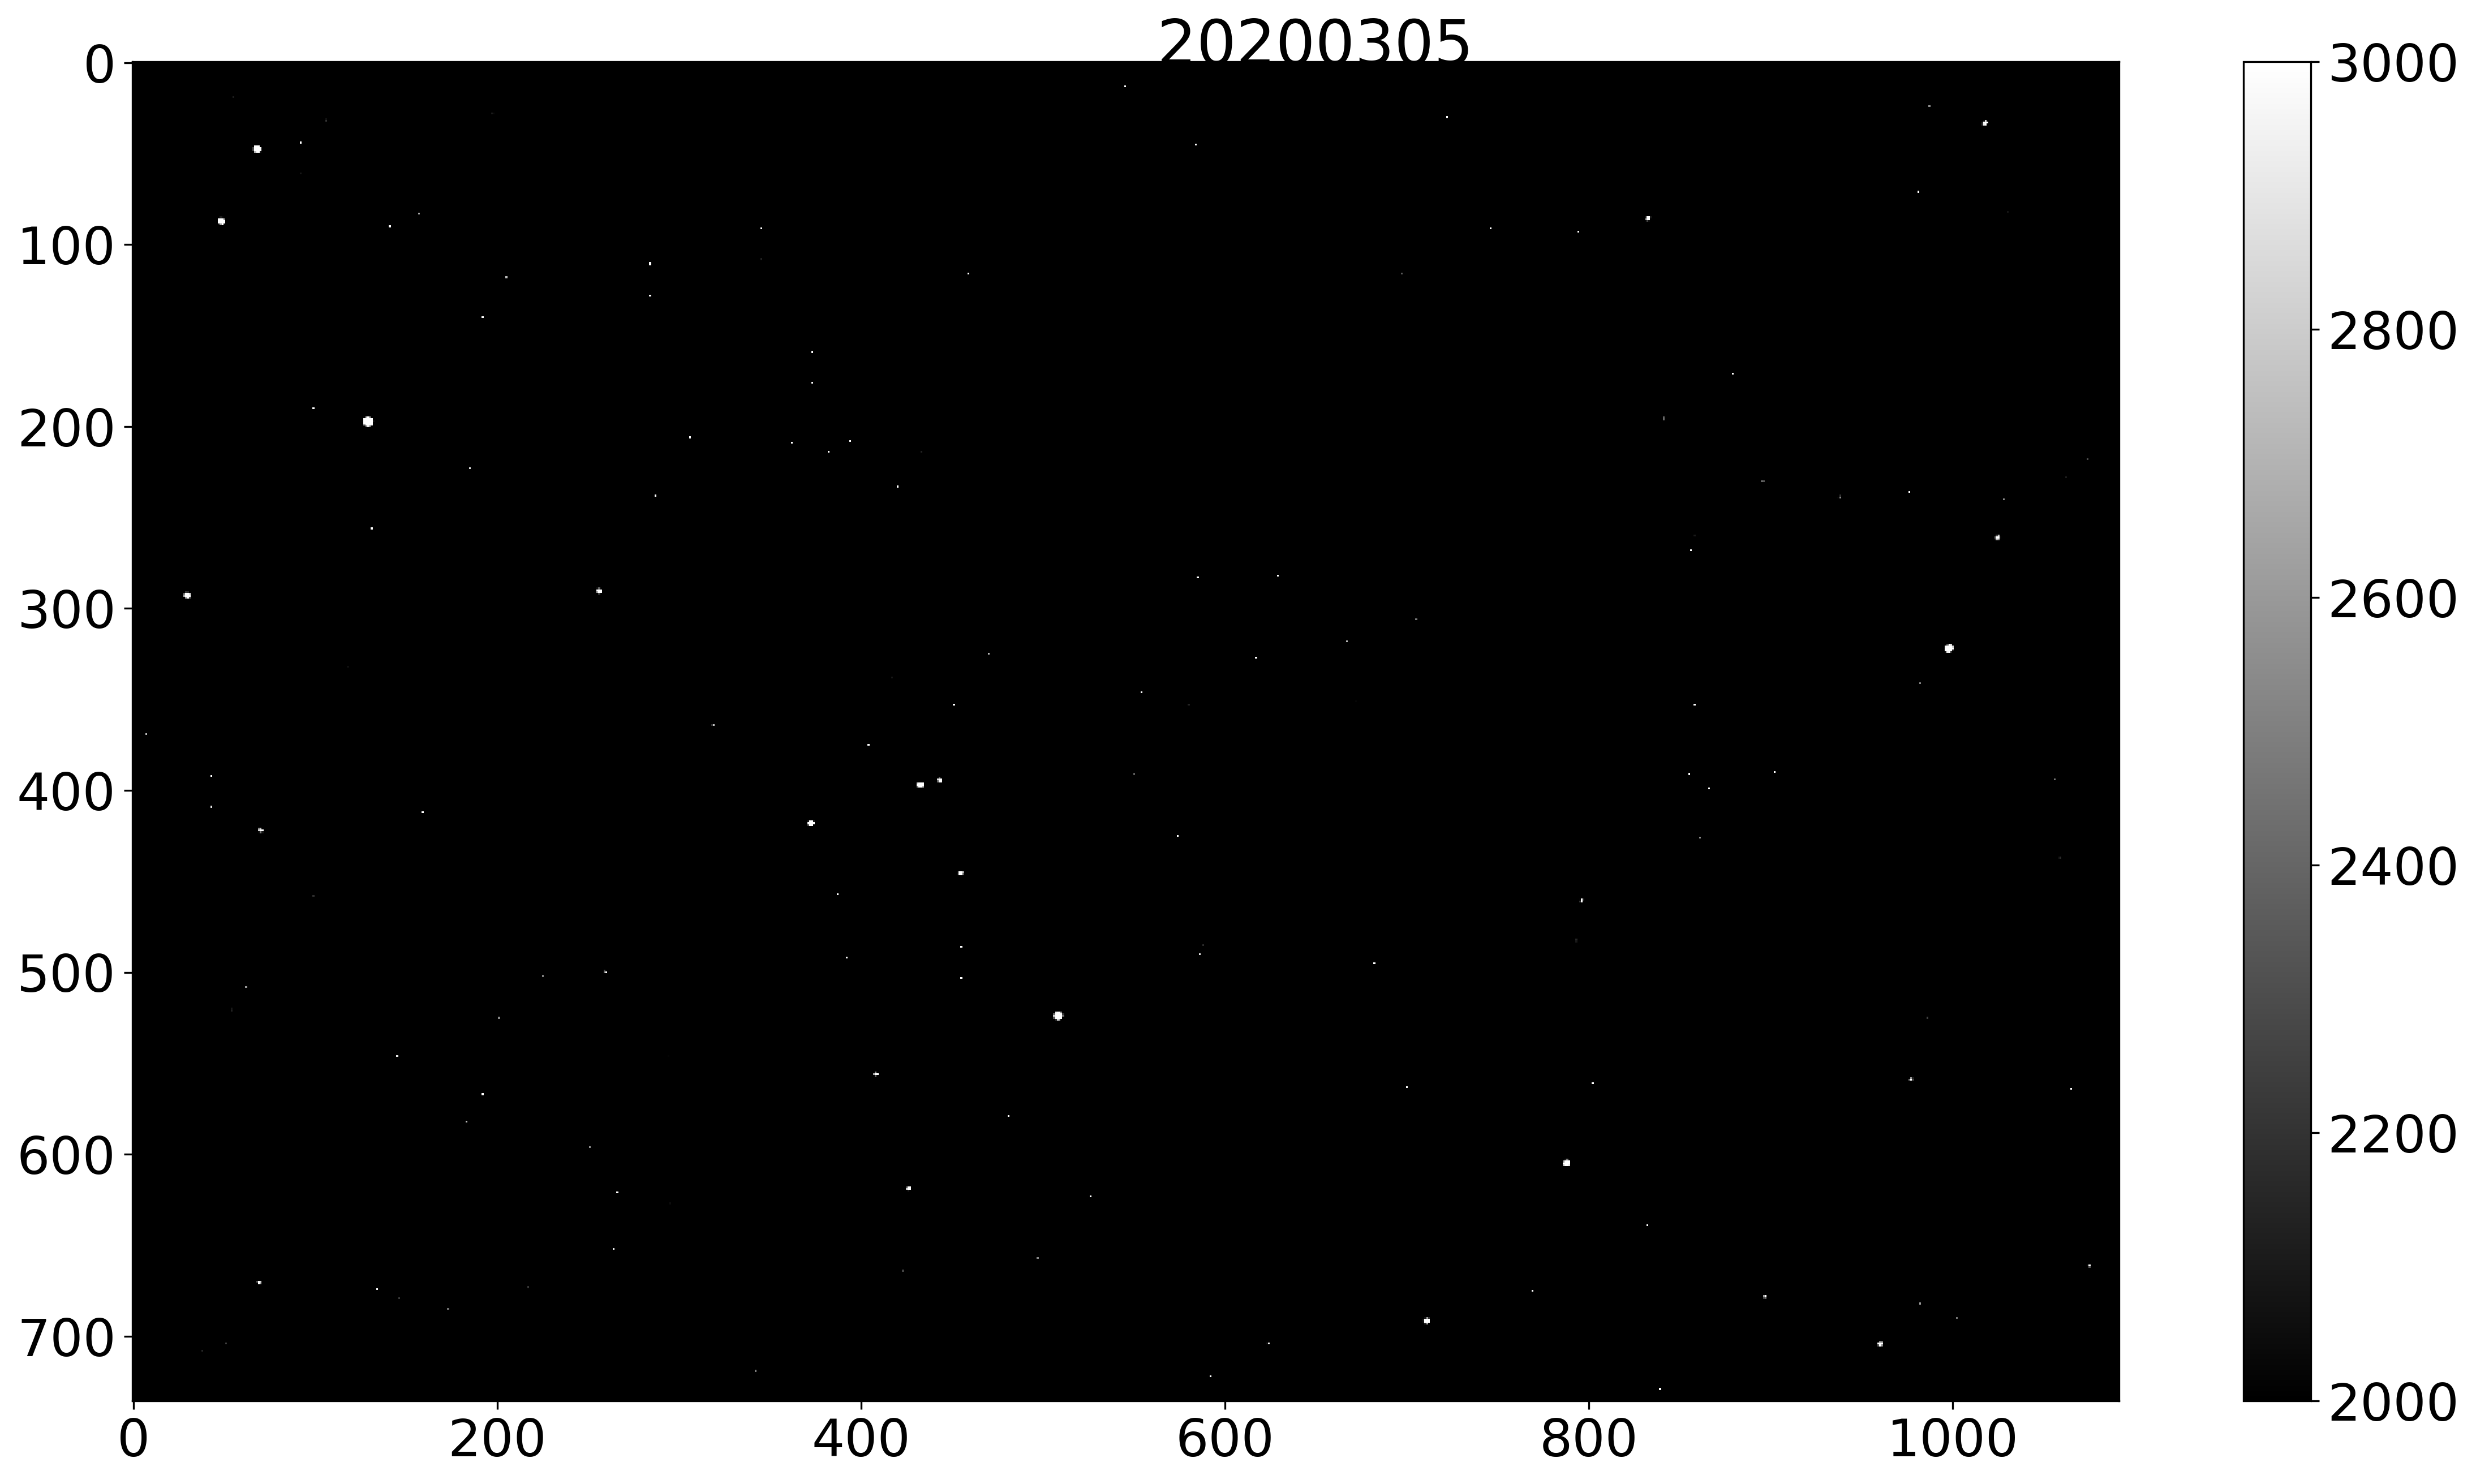

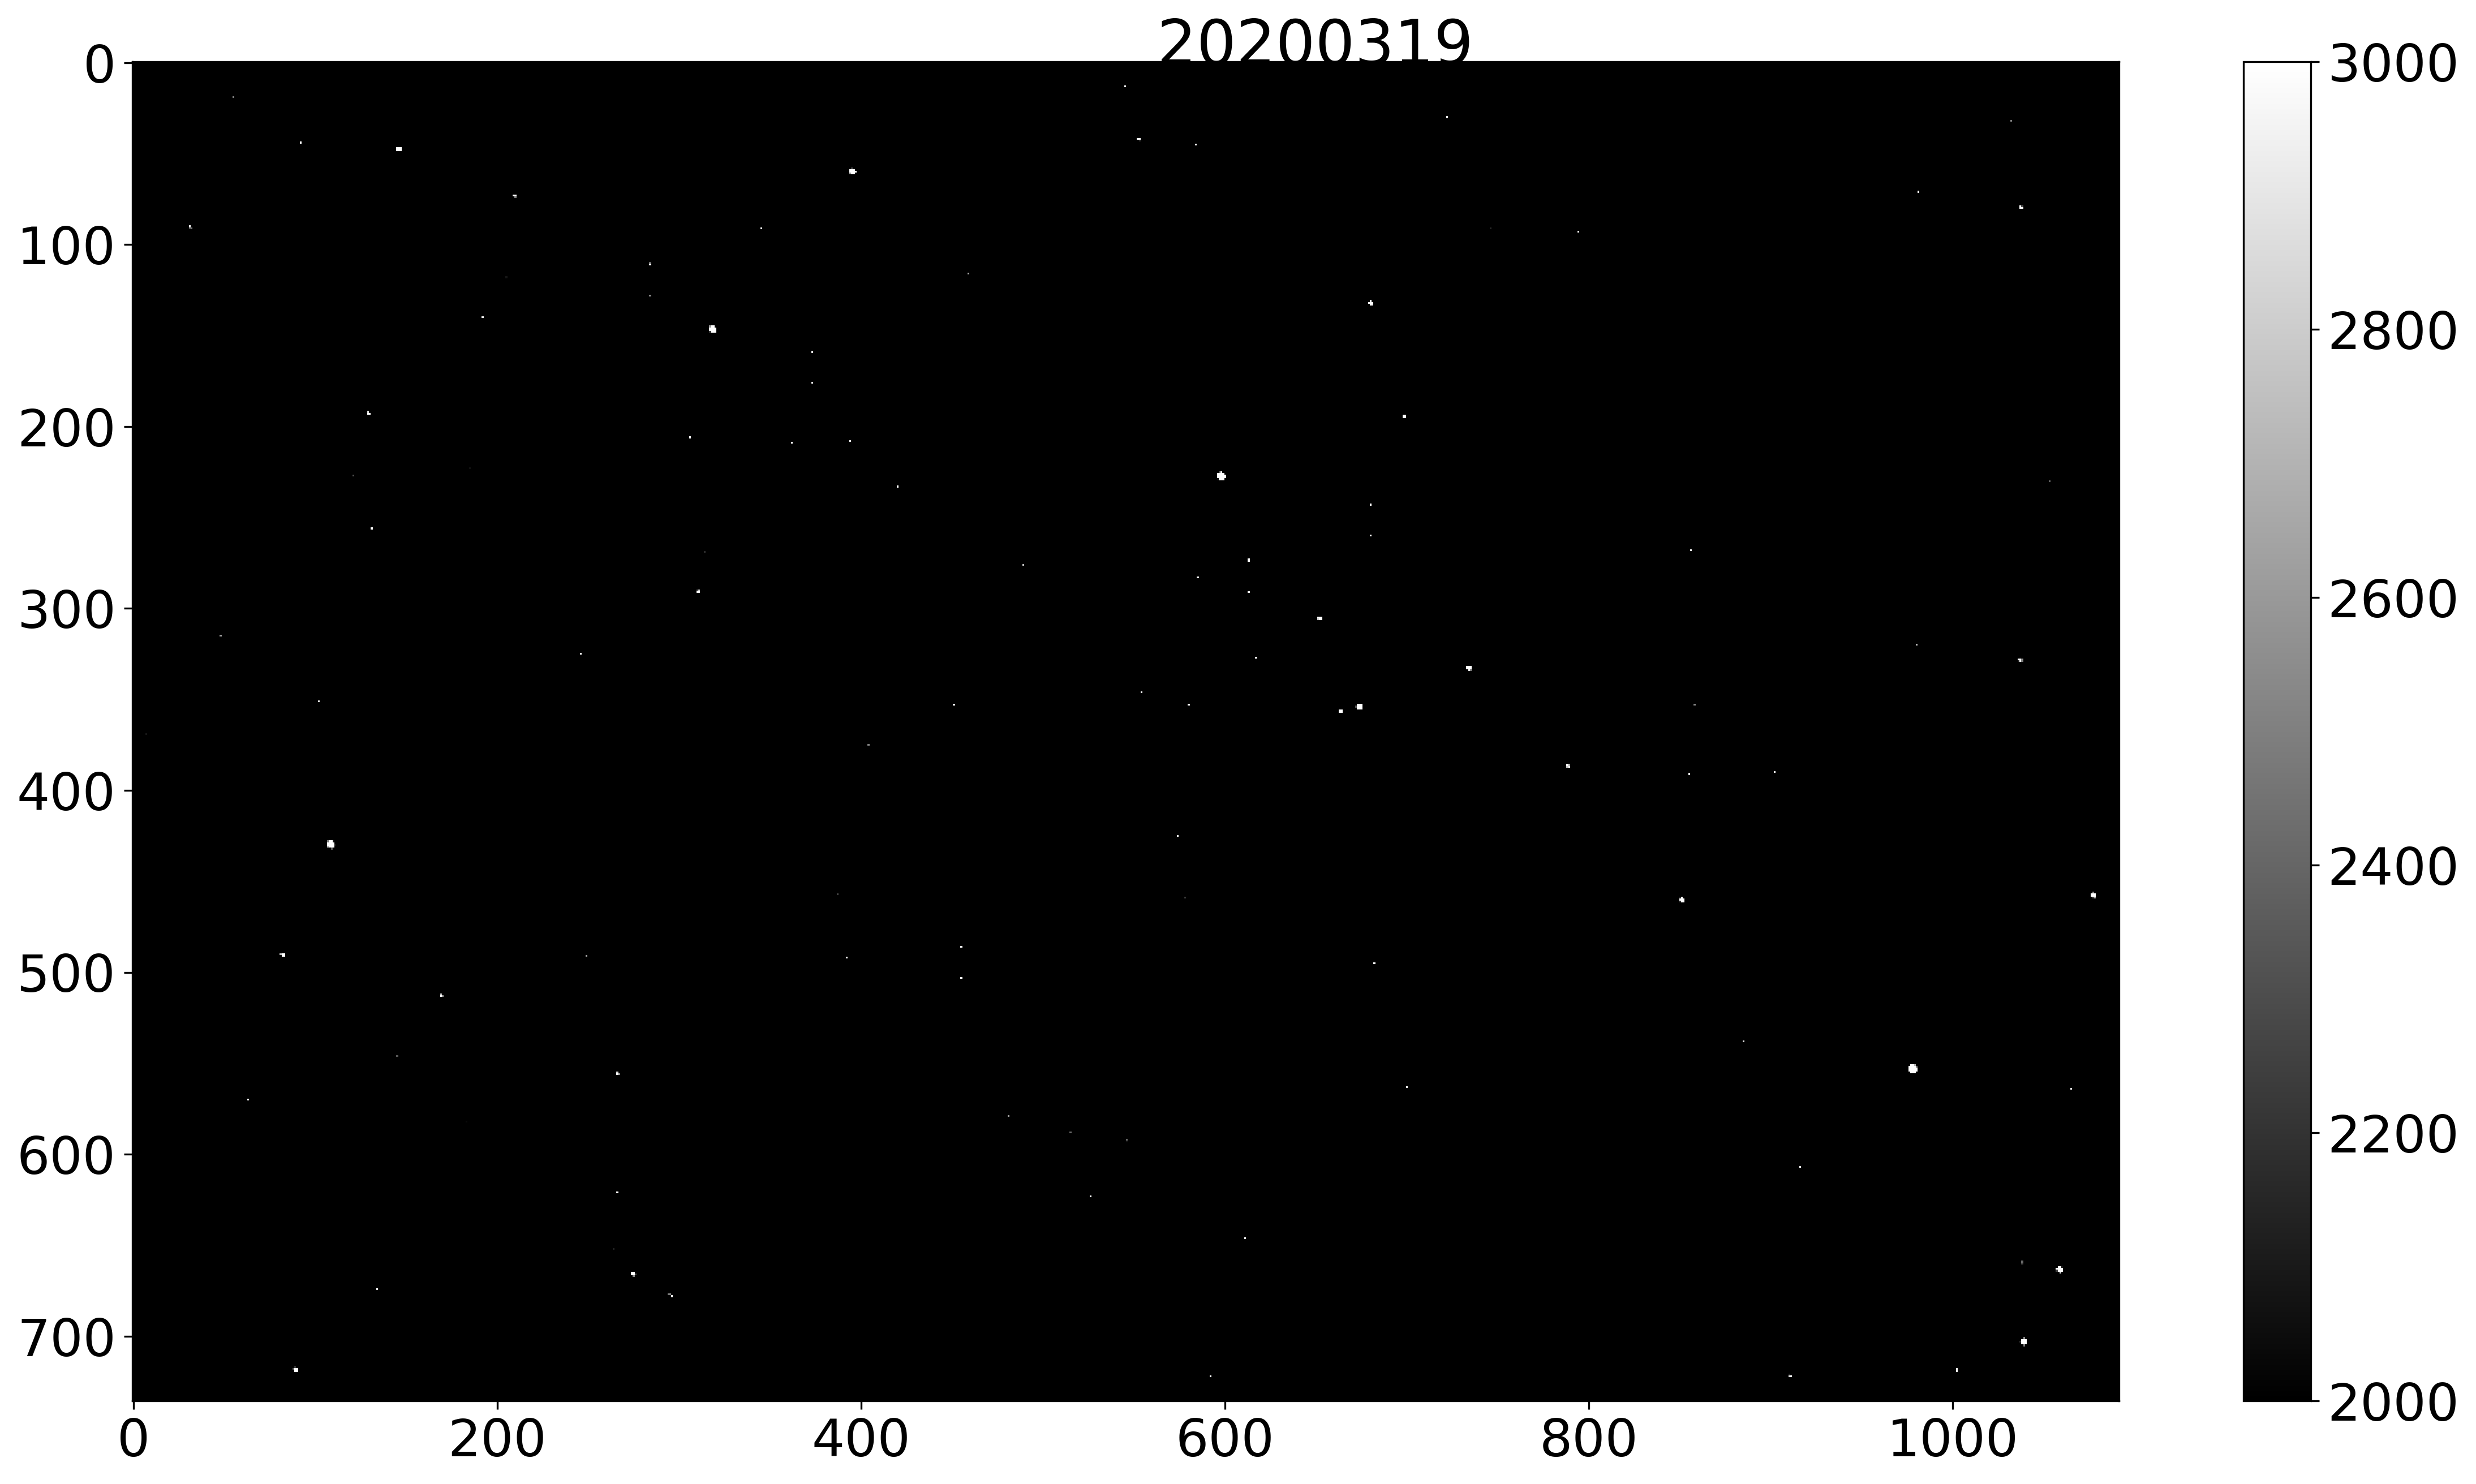

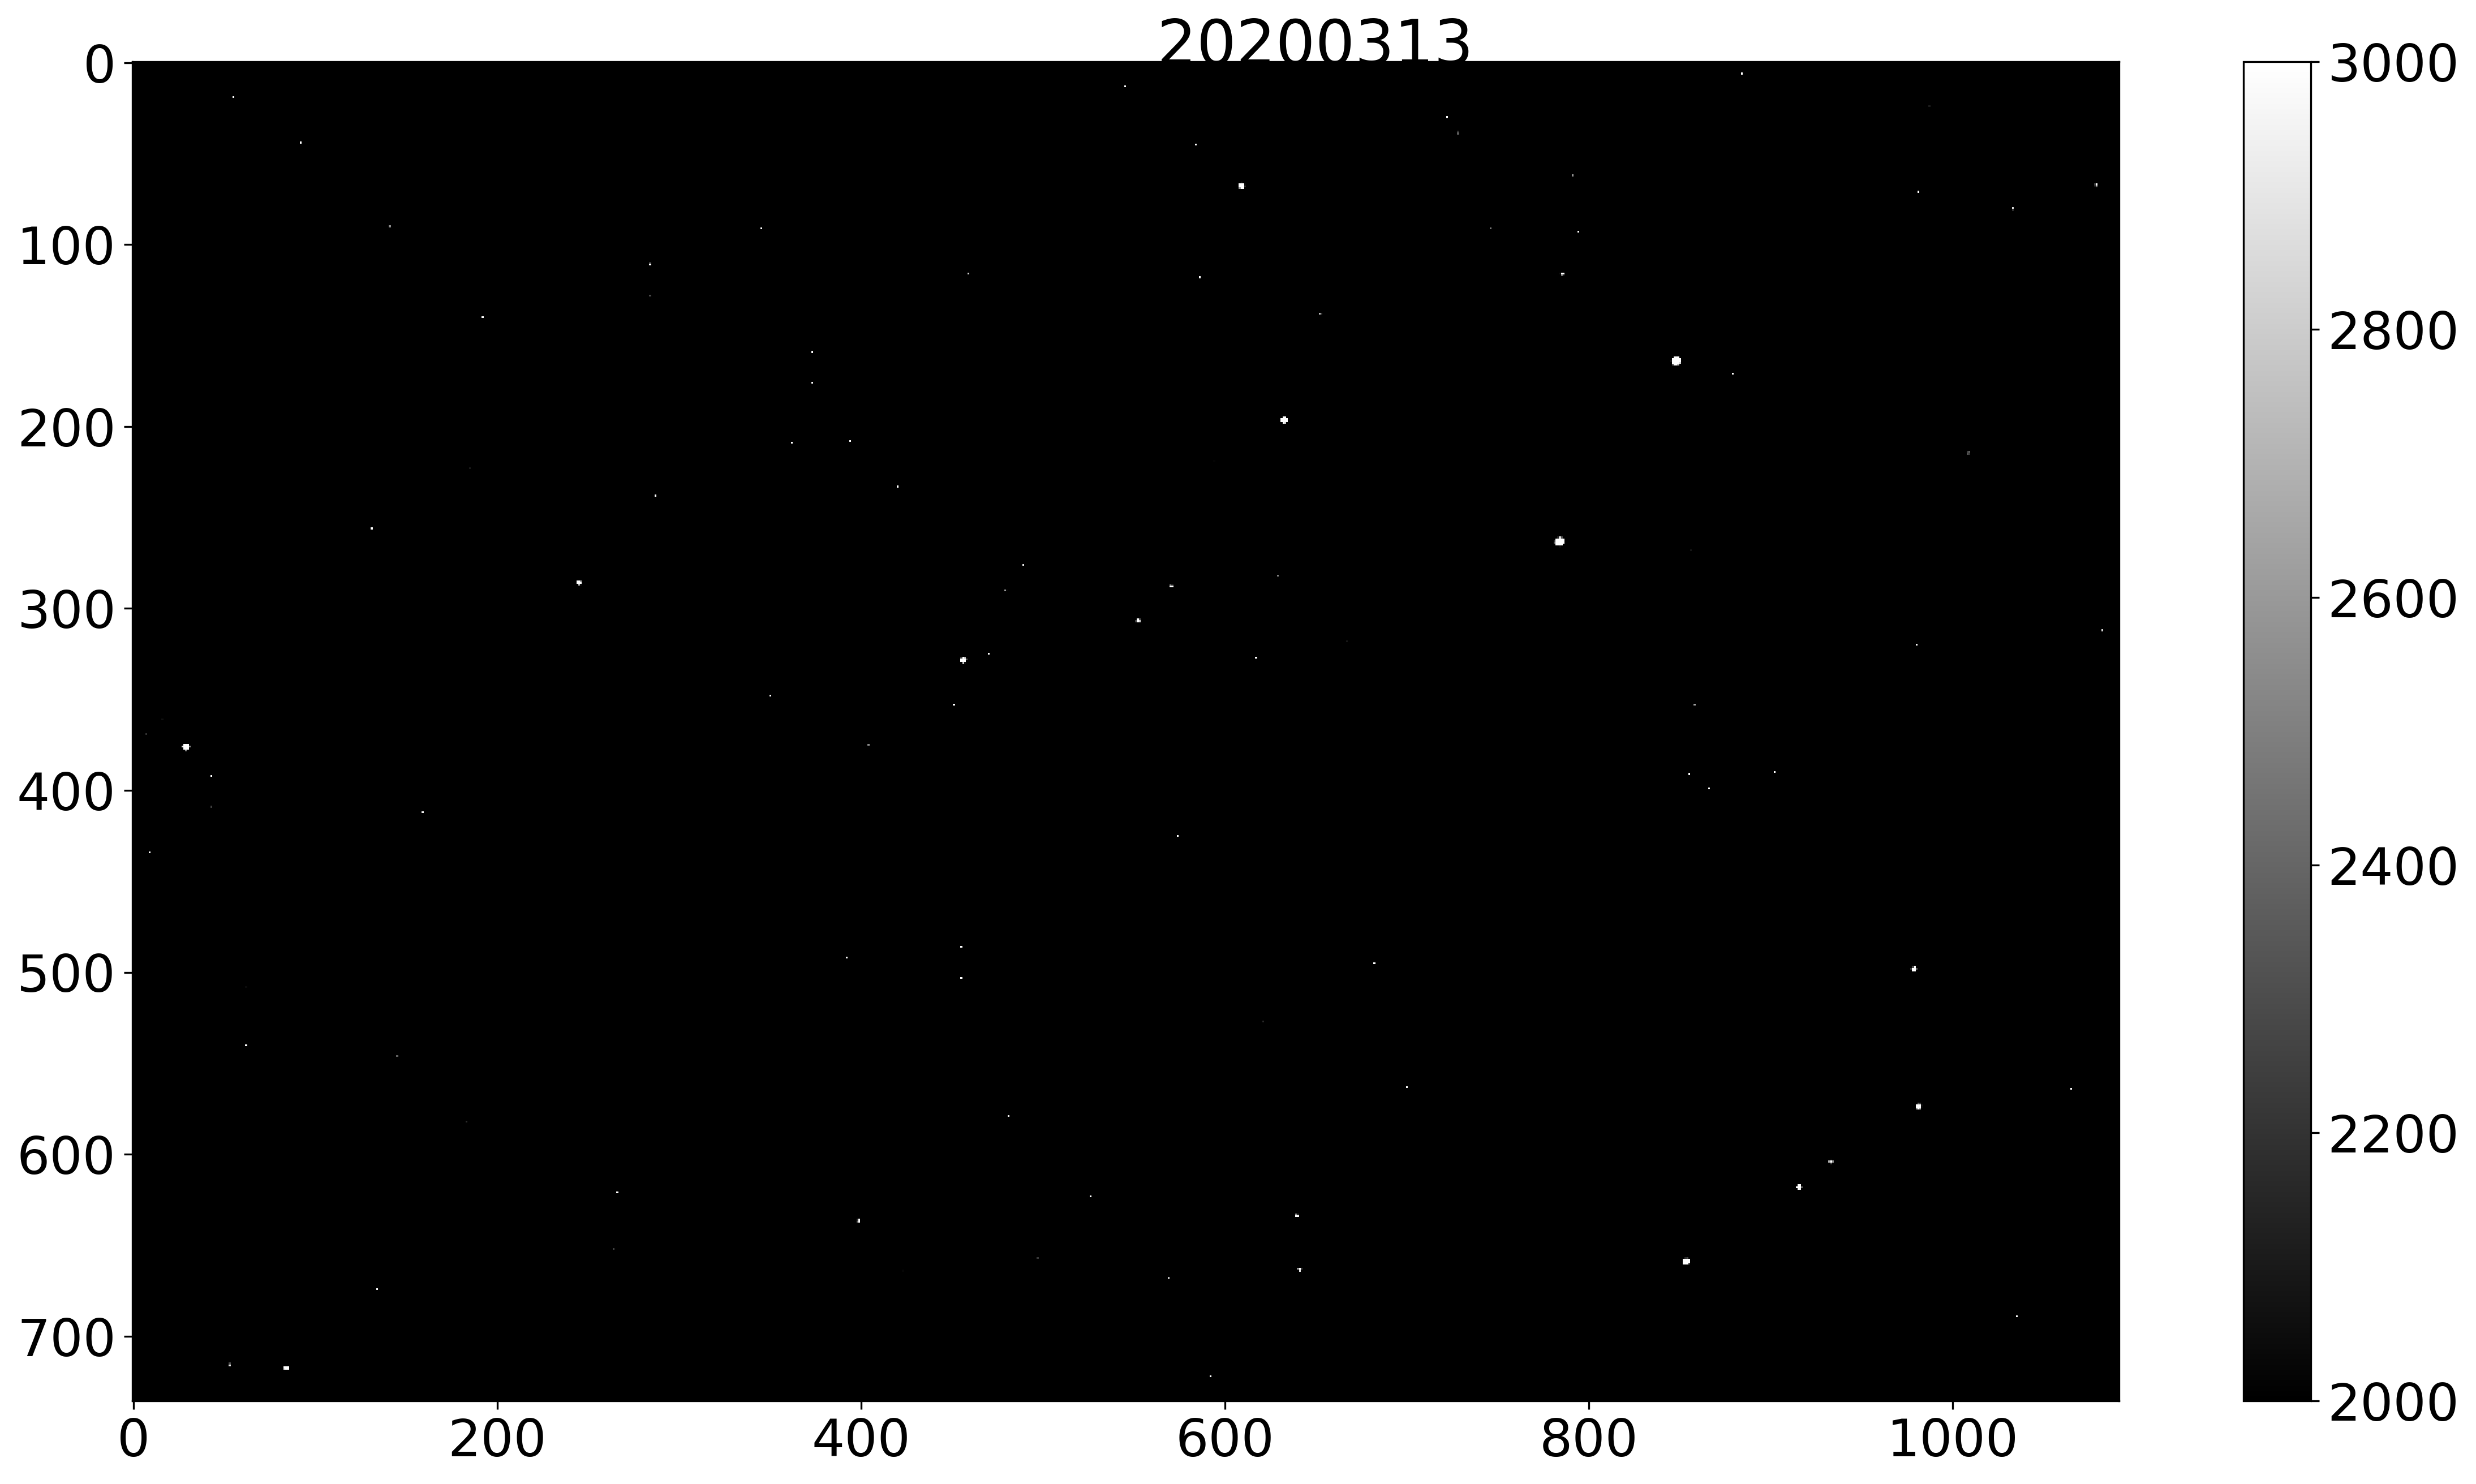

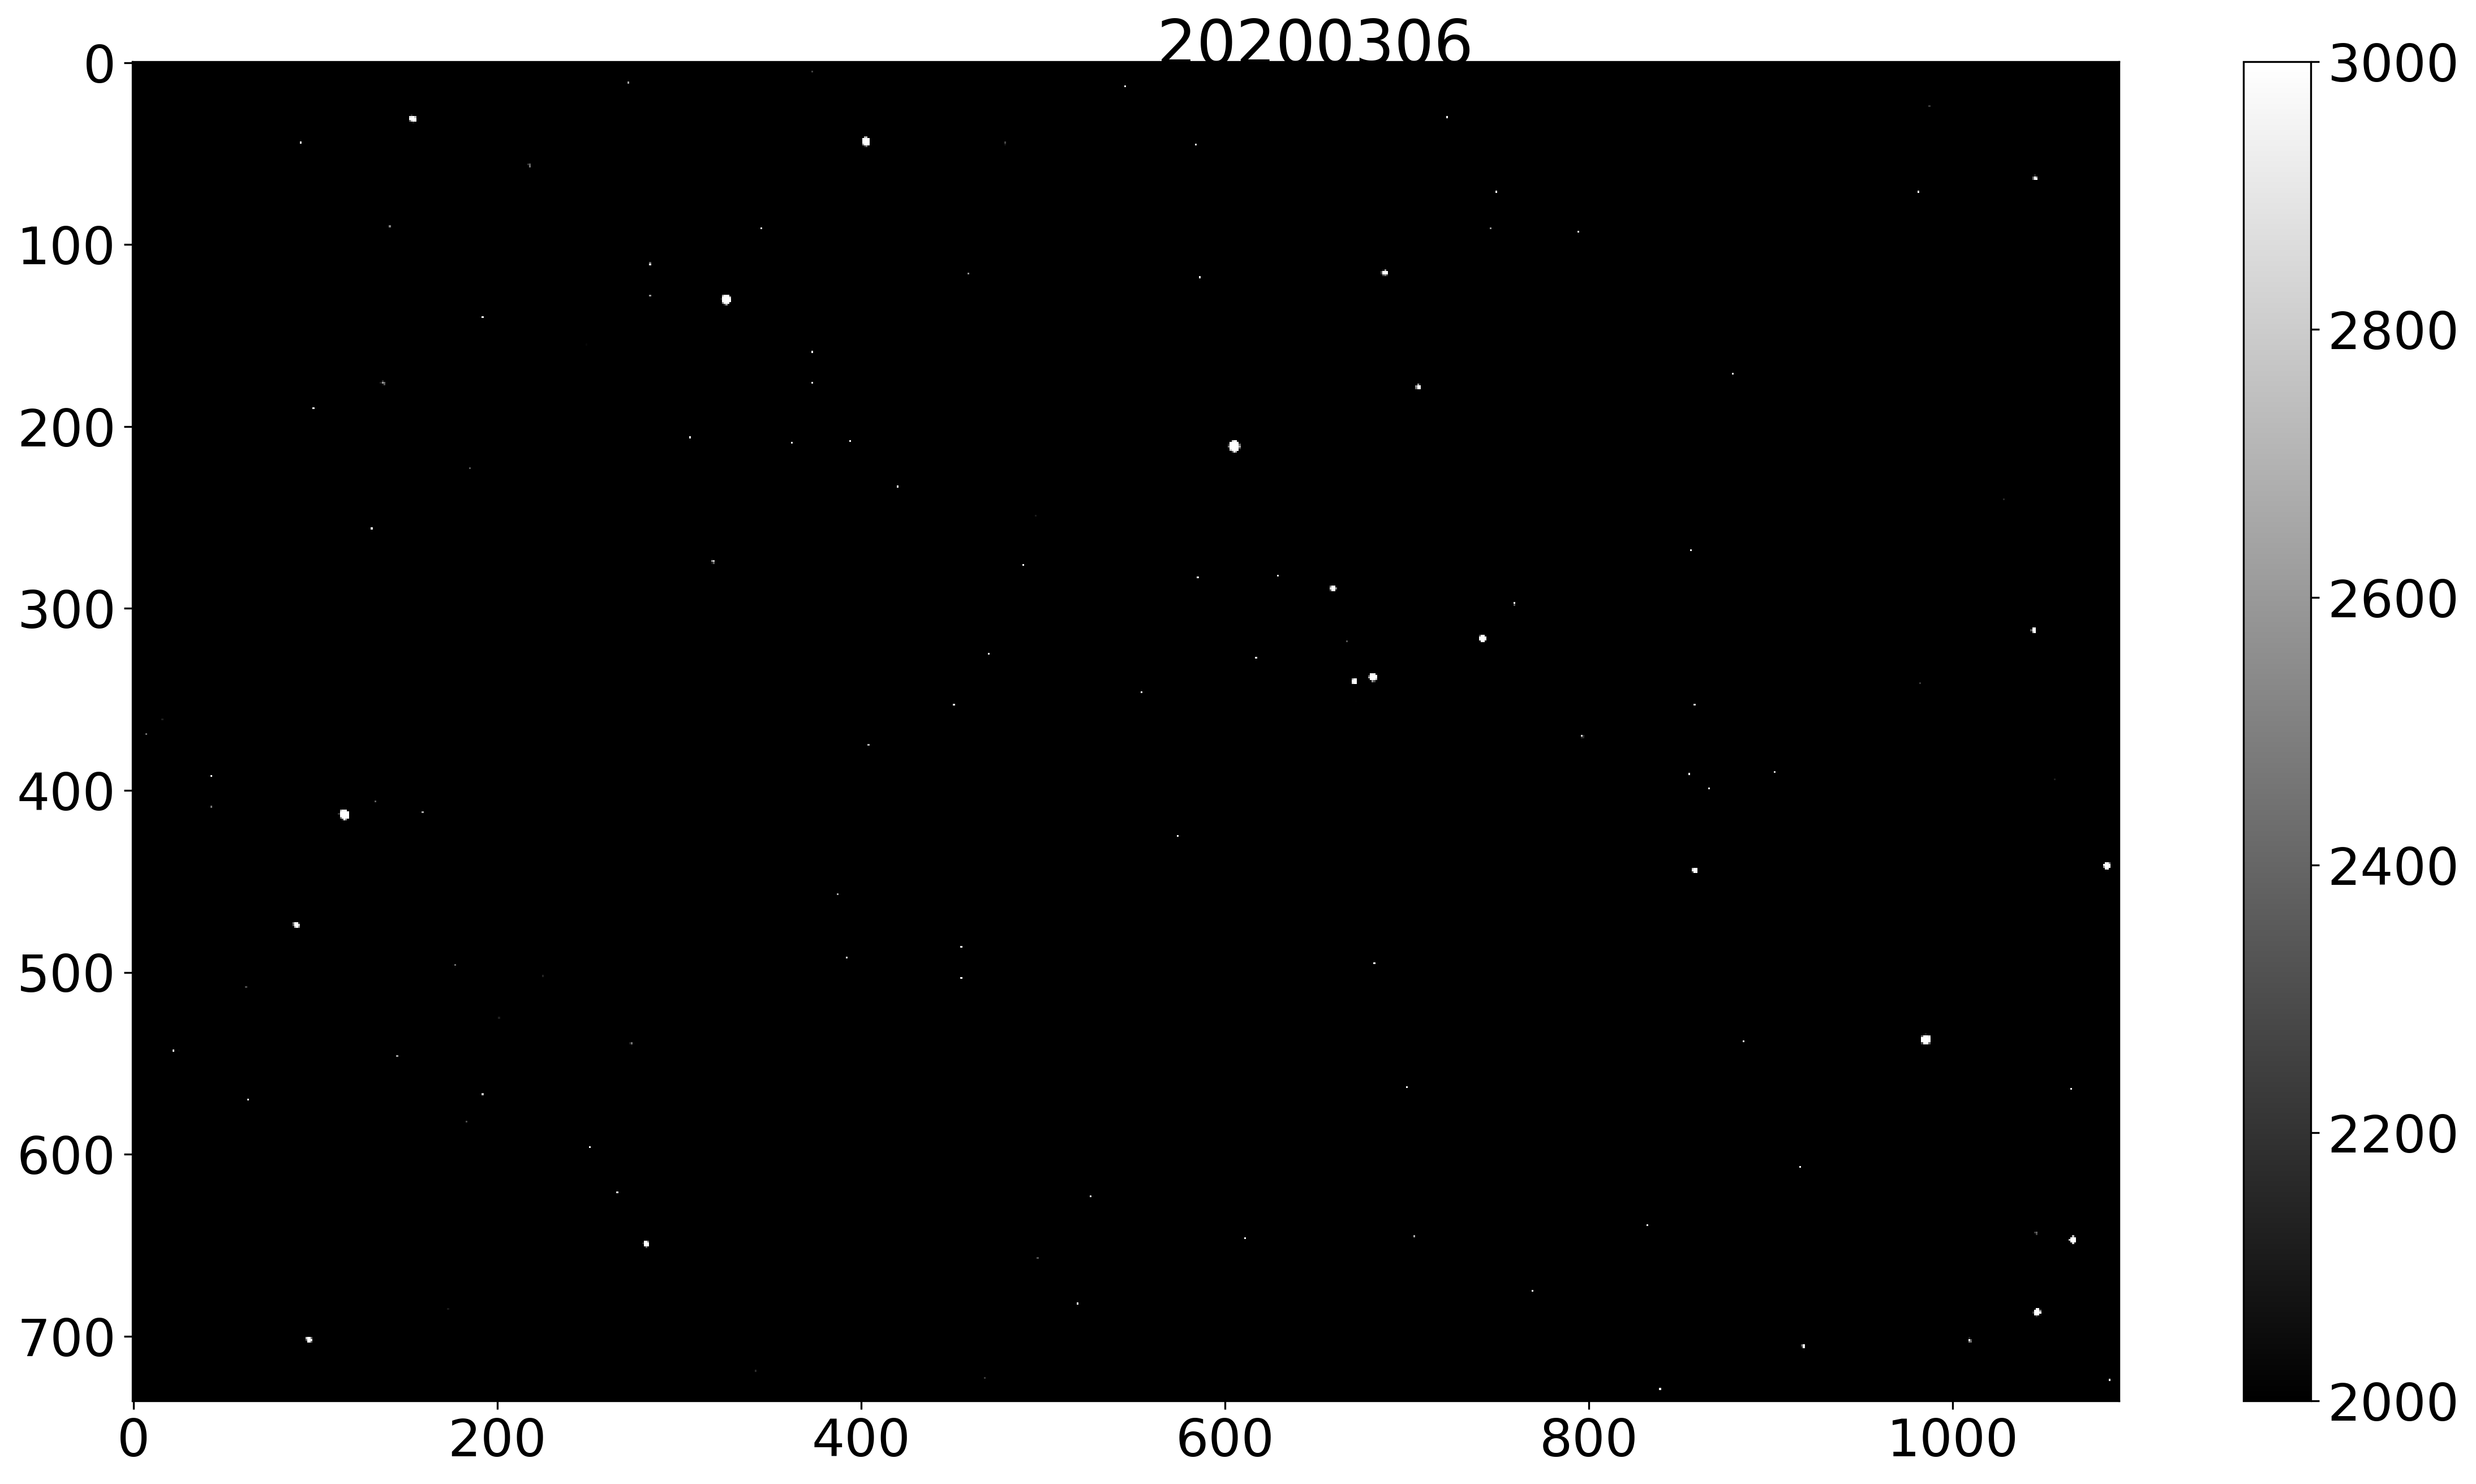

In [9]:
for dossier in phases :
    dossier_images = os.listdir('data/images/%s' %dossier)
    image_concat = []
    time  = np.zeros(len(dossier_images))
    for i, dossier_im in enumerate(dossier_images):
        image = os.listdir('data/images/%s/%s' %(dossier, dossier_im))[0]
        img = fits.getdata('data/images/%s/%s/%s' %(dossier,dossier_im, image))
        image_concat.append(img)
        time[i] = fits.getheader('data/images/%s/%s/%s' %(dossier, dossier_im, image), 0)['JD']
        header = fits.getheader('data/images/%s/%s/%s' %(dossier, dossier_im, image), 0)

        
    exposition = TimeDelta(11.07 * u.s, format = 'jd')
    timemax, timemin = np.amax(time) + exposition.jd, np.amin(time)
    delta_t = TimeDelta((timemax - timemin)/2, format = 'jd')
    t = Time(delta_t.jd + timemin, format='jd')
    final_image = np.sum(image_concat, axis=0)
    
    header['TIME-OBS'] = t.iso
    header['DELTA-T'] = delta_t.sec
    header['JD'] = t.jds
    header['JD-DELTA'] = delta_t.jd
    fits.writeto('data/stacked/%s.fits' %(dossier), final_image, header, overwrite=True)
    
    fig, ax = plt.subplots(1, 1, dpi = 300, figsize = (16, 9))
    fig.suptitle(dossier)
    plt.imshow(final_image, cmap='gray', vmin=2.e3, vmax=3.e3)
    plt.colorbar()

    fig.tight_layout()